In [157]:
import pandas
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [158]:
import pandas as pd  # an alias for pandas
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from os.path import join  # merging paths in a better way

#**Data Sets**

Here, we took our bitcoin data as csv file and coverted it to a dataframe and created new columns which are technical indicators such like EMA(Exponential Moving Avarage) and SMA(Exponential Moving Average) for 15 days and 21 days. Also we calculated daily change ratios of BTC, EMA21, EMA15, SMA21, SMA15.

## First Data Set

In [159]:


# Specify the file path
file_path = '/content/gdrive/My Drive/cs210/y/btc.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
print(df)


                   snapped_at         price    market_cap  total_volume
0     2013-04-28 00:00:00 UTC    135.300000  1.500518e+09  0.000000e+00
1     2013-04-29 00:00:00 UTC    141.960000  1.575032e+09  0.000000e+00
2     2013-04-30 00:00:00 UTC    135.300000  1.501657e+09  0.000000e+00
3     2013-05-01 00:00:00 UTC    117.000000  1.298952e+09  0.000000e+00
4     2013-05-02 00:00:00 UTC    103.430000  1.148668e+09  0.000000e+00
...                       ...           ...           ...           ...
4006  2024-04-18 00:00:00 UTC  61328.897989  1.207185e+12  4.112336e+10
4007  2024-04-19 00:00:00 UTC  63461.592695  1.249566e+12  3.590162e+10
4008  2024-04-20 00:00:00 UTC  63988.818472  1.263308e+12  5.222779e+10
4009  2024-04-21 00:00:00 UTC  64894.418691  1.277941e+12  1.660183e+10
4010  2024-04-22 00:00:00 UTC  64936.420757  1.279764e+12  1.959212e+10

[4011 rows x 4 columns]


In [160]:
df['snapped_at'] = pd.to_datetime(df['snapped_at'])

# Format datetime column to 'YYYY-MM-DD' format
df['snapped_at'] = df['snapped_at'].dt.strftime('%Y-%m-%d')

df = df.rename(columns={'snapped_at': 'Date'})
df.head()

Date   price    market_cap  total_volume
0  2013-04-28  135.30  1.500518e+09           0.0
1  2013-04-29  141.96  1.575032e+09           0.0
2  2013-04-30  135.30  1.501657e+09           0.0
3  2013-05-01  117.00  1.298952e+09           0.0
4  2013-05-02  103.43  1.148668e+09           0.0

In [161]:
def add_ema_column(df):
    """
    Add a new column for the x-day exponential moving average (EMA) to a DataFrame.


    df (pandas.DataFrame): DataFrame containing Bitcoin prices.
    window (int): Number of days for the EMA calculation for 15 and 21.

    Returns:
        pandas.DataFrame: DataFrame with an additional column for the EMA.
    """
    ema15 = df['price'].ewm(span=15, adjust=False).mean()  # Calculate EMA
    ema21 = df['price'].ewm(span=21, adjust=False).mean()
    df['EMA_15'] = ema15  # Add EMA column to DataFrame
    df['EMA_21'] = ema21  # Add EMA column to DataFrame
    # Format the 'EMA_15' column to have only two decimal places
    df['EMA_15'] = df['EMA_15'].apply(lambda x: format(x, '.2f'))
    df['EMA_21'] = df['EMA_21'].apply(lambda x: format(x, '.2f'))
    return df

df=add_ema_column(df)

df=df[1:]
df.head(5000)

Date         price    market_cap  total_volume    EMA_15    EMA_21
1     2013-04-29    141.960000  1.575032e+09  0.000000e+00    136.13    135.91
2     2013-04-30    135.300000  1.501657e+09  0.000000e+00    136.03    135.85
3     2013-05-01    117.000000  1.298952e+09  0.000000e+00    133.65    134.14
4     2013-05-02    103.430000  1.148668e+09  0.000000e+00    129.87    131.35
5     2013-05-03     91.010000  1.011066e+09  0.000000e+00    125.01    127.68
...          ...           ...           ...           ...       ...       ...
4006  2024-04-18  61328.897989  1.207185e+12  4.112336e+10  66287.41  66671.71
4007  2024-04-19  63461.592695  1.249566e+12  3.590162e+10  65934.19  66379.88
4008  2024-04-20  63988.818472  1.263308e+12  5.222779e+10  65691.01  66162.51
4009  2024-04-21  64894.418691  1.277941e+12  1.660183e+10  65591.44  66047.23
4010  2024-04-22  64936.420757  1.279764e+12  1.959212e+10  65509.56  65946.25

[4010 rows x 6 columns]

In [162]:
df= df.set_index("Date")

In [163]:


def add_sma_column(df, ):
    """
    Add a new column for the 15-day Simple Moving Average (SMA) to a DataFrame.


    df (pandas.DataFrame): DataFrame containing Bitcoin prices.
    window (int): Number of days for the SMA calculation. Default is 15.

    Returns:
        pandas.DataFrame: DataFrame with an additional column for the SMA.
    """
    df['SMA_15'] = df['price'].rolling(window=15).mean()
    df['SMA_15'] = df['SMA_15'].apply(lambda x: format(x, '.2f'))

    df['SMA_21'] = df['price'].rolling(window=21).mean()
    df['SMA_21'] = df['SMA_21'].apply(lambda x: format(x, '.2f'))
    return df

df=add_sma_column(df)

df

price    market_cap  total_volume    EMA_15    EMA_21  \
Date                                                                       
2013-04-29    141.960000  1.575032e+09  0.000000e+00    136.13    135.91   
2013-04-30    135.300000  1.501657e+09  0.000000e+00    136.03    135.85   
2013-05-01    117.000000  1.298952e+09  0.000000e+00    133.65    134.14   
2013-05-02    103.430000  1.148668e+09  0.000000e+00    129.87    131.35   
2013-05-03     91.010000  1.011066e+09  0.000000e+00    125.01    127.68   
...                  ...           ...           ...       ...       ...   
2024-04-18  61328.897989  1.207185e+12  4.112336e+10  66287.41  66671.71   
2024-04-19  63461.592695  1.249566e+12  3.590162e+10  65934.19  66379.88   
2024-04-20  63988.818472  1.263308e+12  5.222779e+10  65691.01  66162.51   
2024-04-21  64894.418691  1.277941e+12  1.660183e+10  65591.44  66047.23   
2024-04-22  64936.420757  1.279764e+12  1.959212e+10  65509.56  65946.25   

              SMA_15    SMA_21  
Date                            
2013-04-29       nan       nan  
2013-04-30       nan       nan  
2013-05-01       nan       nan  
2013-05-02       nan       nan  
2013-05-03       nan       nan  
...              ...       ...  
2024-04-18  67223.62  67864.72  
2024-04-19  67046.13  67519.55  
2024-04-20  66742.57  67237.16  
2024-04-21  66536.96  67008.21  
2024-04-22  66266.01  66707.71  

[4010 rows x 7 columns]

In [164]:
##daily change ration column
df['dcr'] = df["price"].pct_change()


In [165]:
df["EMA_15"] = df["EMA_15"].astype(float)
df["SMA_15"] = df["SMA_15"].astype(float)
df["EMA_21"] = df["EMA_21"].astype(float)
df["SMA_21"] = df["SMA_21"].astype(float)

In [166]:
## Daily change ratio of EMA7
df['e_dcr21'] = df["EMA_21"].pct_change()

## Daily change ratio of EMA15
df['e_dcr15'] = df["EMA_15"].pct_change()

## Daily change ratio of SMA7
df['s_dcr21'] = df["SMA_21"].pct_change()

## Daily change ratio of SMA15
df['s_dcr15'] = df["SMA_15"].pct_change()


In [167]:
df.describe()

price    market_cap  total_volume        EMA_15        EMA_21  \
count   4010.000000  4.009000e+03  4.010000e+03   4010.000000   4010.000000   
mean   13967.358403  2.624101e+11  1.472683e+10  13853.238746  13803.241446   
std    17283.464438  3.318152e+11  1.842921e+10  17087.916314  16998.357485   
min       67.809000  7.713681e+08  0.000000e+00     84.580000     88.470000   
25%      590.135950  7.994473e+09  2.190498e+08    597.980000    597.150000   
50%     6958.802371  1.224453e+11  4.901391e+09   6922.180000   6920.630000   
75%    22840.840245  4.370356e+11  2.464368e+10  22588.632500  22465.780000   
max    73097.767027  1.436631e+12  1.788941e+11  69172.580000  68698.170000   

             SMA_15        SMA_21          dcr      e_dcr21      e_dcr15  \
count   3996.000000   3990.000000  4009.000000  4009.000000  4009.000000   
mean   13902.677477  13872.596140     0.002299     0.001590     0.001603   
std    17127.860992  17053.483942     0.039176     0.009695     0.011068   
min       83.880000     86.460000    -0.351903    -0.037531    -0.050220   
25%      598.542500    601.210000    -0.012704    -0.003404    -0.004006   
50%     7001.475000   7045.965000     0.001563     0.000780     0.000696   
75%    22850.857500  22840.262500     0.017911     0.005809     0.006496   
max    69284.640000  68937.820000     0.332556     0.077009     0.092463   

           s_dcr21      s_dcr15  
count  3989.000000  3995.000000  
mean      0.001640     0.001652  
std       0.009726     0.011067  
min      -0.028687    -0.038597  
25%      -0.003820    -0.004257  
50%       0.001021     0.001058  
75%       0.006402     0.006863  
max       0.072370     0.072408

In [168]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

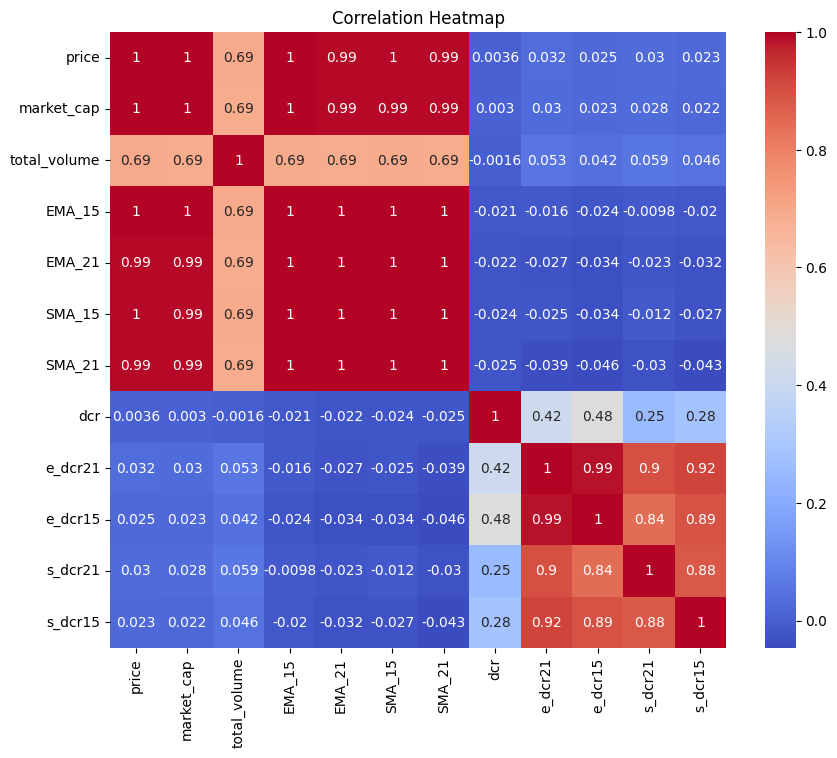

In [169]:
 # Calculate correlation matrix
import seaborn as sns
corr_matrix = numeric_df.corr()

    # Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

## Second Data Set

Here, we took the data of Fear and Greed Index via API and made necessary things to use data directly.


In [170]:
import os
import requests
import csv

def fetch_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print("Failed to fetch data:", response.status_code)
        return None

def save_as_csv(data, filename):
    try:
        with open(filename, 'w', newline='') as csvfile:
            csvfile.write(data)
        print("Data saved successfully as", filename)
    except Exception as e:
        print("Error saving data:", e)

if __name__ == "__main__":
    api_url = "https://api.alternative.me/fng/?limit=5000"
    data = fetch_data(api_url)
    if data:
        data_path = "/content/gdrive/My Drive/cs210/y"
        # Ensure the directory exists
        if not os.path.exists(data_path):
            os.makedirs(data_path)

        filename = os.path.join(data_path, "fgi.csv")
        save_as_csv(data, filename)


Data saved successfully as /content/gdrive/My Drive/cs210/y/fgi.csv


In [171]:
import pandas as pd
import json

# Assuming the file path
csv_file = "/content/gdrive/My Drive/cs210/y/fgi.csv"

def read_json_csv(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

def convert_json_to_dataframe(data):
    # Extract the 'values' field from the JSON data
    values = data['data']

    # Convert the list of dictionaries into a DataFrame
    df_fgi = pd.DataFrame(values)
    return df_fgi

if __name__ == "__main__":
    # Read JSON data from the CSV file
    json_data = read_json_csv(csv_file)
    # Convert JSON data to DataFrame
    df_fgi = convert_json_to_dataframe(json_data)
    # Display the DataFrame
    print(df_fgi)


     value value_classification   timestamp time_until_update
0       76        Extreme Greed  1716336000             17390
1       76        Extreme Greed  1716249600               NaN
2       70                Greed  1716163200               NaN
3       72                Greed  1716076800               NaN
4       73                Greed  1715990400               NaN
...    ...                  ...         ...               ...
2295    11         Extreme Fear  1517788800               NaN
2296    24         Extreme Fear  1517702400               NaN
2297    40                 Fear  1517616000               NaN
2298    15         Extreme Fear  1517529600               NaN
2299    30                 Fear  1517443200               NaN

[2300 rows x 4 columns]


In [172]:
# Assuming df_combined is your DataFrame with the data
# Convert the timestamp column to datetime
df_fgi['timestamp'] = pd.to_datetime(df_fgi['timestamp'], unit='s')

# Display the DataFrame with the timestamp column converted
df_fgi

<ipython-input-172-dbcb7b15ecfc>:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_fgi['timestamp'] = pd.to_datetime(df_fgi['timestamp'], unit='s')


value value_classification  timestamp time_until_update
0       76        Extreme Greed 2024-05-22             17390
1       76        Extreme Greed 2024-05-21               NaN
2       70                Greed 2024-05-20               NaN
3       72                Greed 2024-05-19               NaN
4       73                Greed 2024-05-18               NaN
...    ...                  ...        ...               ...
2295    11         Extreme Fear 2018-02-05               NaN
2296    24         Extreme Fear 2018-02-04               NaN
2297    40                 Fear 2018-02-03               NaN
2298    15         Extreme Fear 2018-02-02               NaN
2299    30                 Fear 2018-02-01               NaN

[2300 rows x 4 columns]

In [173]:
df_fgi = df_fgi.drop(columns=["time_until_update"])

df_fgi.head(5000)

value value_classification  timestamp
0       76        Extreme Greed 2024-05-22
1       76        Extreme Greed 2024-05-21
2       70                Greed 2024-05-20
3       72                Greed 2024-05-19
4       73                Greed 2024-05-18
...    ...                  ...        ...
2295    11         Extreme Fear 2018-02-05
2296    24         Extreme Fear 2018-02-04
2297    40                 Fear 2018-02-03
2298    15         Extreme Fear 2018-02-02
2299    30                 Fear 2018-02-01

[2300 rows x 3 columns]

In [174]:
df_fgi= df_fgi.set_index("timestamp")

In [175]:
df_fgi =  df_fgi.rename_axis("Date")

In [176]:
df.index = pd.to_datetime(df.index)

In [177]:
print("Index of DataFrame 1:")
print(df.index)
print("\nIndex of DataFrame 2:")
print(df_fgi.index)

Index of DataFrame 1:
DatetimeIndex(['2013-04-29', '2013-04-30', '2013-05-01', '2013-05-02',
               '2013-05-03', '2013-05-04', '2013-05-05', '2013-05-06',
               '2013-05-07', '2013-05-08',
               ...
               '2024-04-13', '2024-04-14', '2024-04-15', '2024-04-16',
               '2024-04-17', '2024-04-18', '2024-04-19', '2024-04-20',
               '2024-04-21', '2024-04-22'],
              dtype='datetime64[ns]', name='Date', length=4010, freq=None)

Index of DataFrame 2:
DatetimeIndex(['2024-05-22', '2024-05-21', '2024-05-20', '2024-05-19',
               '2024-05-18', '2024-05-17', '2024-05-16', '2024-05-15',
               '2024-05-14', '2024-05-13',
               ...
               '2018-02-10', '2018-02-09', '2018-02-08', '2018-02-07',
               '2018-02-06', '2018-02-05', '2018-02-04', '2018-02-03',
               '2018-02-02', '2018-02-01'],
              dtype='datetime64[ns]', name='Date', length=2300, freq=None)


In [178]:
 merged_df=pd.merge(df, df_fgi, left_index=True, right_index=True)

In [179]:
merged_df.head(5000)

price    market_cap  total_volume    EMA_15    EMA_21  \
Date                                                                       
2018-02-01  10114.495086  1.703042e+11  3.225562e+09  11469.08  11952.27   
2018-02-02   9070.555449  1.527442e+11  4.769515e+09  11169.26  11690.30   
2018-02-03   8830.163510  1.487152e+11  6.813550e+09  10876.87  11430.29   
2018-02-04   8994.914866  1.515073e+11  3.422042e+09  10641.63  11208.89   
2018-02-05   8315.517491  1.400815e+11  3.337096e+09  10350.87  10945.86   
...                  ...           ...           ...       ...       ...   
2024-04-18  61328.897989  1.207185e+12  4.112336e+10  66287.41  66671.71   
2024-04-19  63461.592695  1.249566e+12  3.590162e+10  65934.19  66379.88   
2024-04-20  63988.818472  1.263308e+12  5.222779e+10  65691.01  66162.51   
2024-04-21  64894.418691  1.277941e+12  1.660183e+10  65591.44  66047.23   
2024-04-22  64936.420757  1.279764e+12  1.959212e+10  65509.56  65946.25   

              SMA_15    SMA_21       dcr   e_dcr21   e_dcr15   s_dcr21  \
Date                                                                     
2018-02-01  11280.23  11961.14  0.012493 -0.015143 -0.016592 -0.015429   
2018-02-02  11113.64  11690.25 -0.103212 -0.021918 -0.026142 -0.022648   
2018-02-03  10918.42  11387.24 -0.026502 -0.022242 -0.026178 -0.025920   
2018-02-04  10634.07  11126.21  0.018658 -0.019370 -0.021628 -0.022923   
2018-02-05  10408.20  10835.90 -0.075531 -0.023466 -0.027323 -0.026092   
...              ...       ...       ...       ...       ...       ...   
2024-04-18  67223.62  67864.72 -0.037533 -0.007950 -0.010573 -0.005656   
2024-04-19  67046.13  67519.55  0.034775 -0.004377 -0.005329 -0.005086   
2024-04-20  66742.57  67237.16  0.008308 -0.003275 -0.003688 -0.004182   
2024-04-21  66536.96  67008.21  0.014152 -0.001742 -0.001516 -0.003405   
2024-04-22  66266.01  66707.71  0.000647 -0.001529 -0.001248 -0.004485   

             s_dcr15 value value_classification  
Date                                             
2018-02-01 -0.007630    30                 Fear  
2018-02-02 -0.014768    15         Extreme Fear  
2018-02-03 -0.017566    40                 Fear  
2018-02-04 -0.026043    24         Extreme Fear  
2018-02-05 -0.021240    11         Extreme Fear  
...              ...   ...                  ...  
2024-04-18 -0.004061    57                Greed  
2024-04-19 -0.002640    66                Greed  
2024-04-20 -0.004528    66                Greed  
2024-04-21 -0.003081    72                Greed  
2024-04-22 -0.004072    73                Greed  

[2270 rows x 14 columns]

In [180]:
 merged_df["value"] = merged_df["value"].astype(int)

In [181]:
  print(merged_df.dtypes)

price                   float64
market_cap              float64
total_volume            float64
EMA_15                  float64
EMA_21                  float64
SMA_15                  float64
SMA_21                  float64
dcr                     float64
e_dcr21                 float64
e_dcr15                 float64
s_dcr21                 float64
s_dcr15                 float64
value                     int64
value_classification     object
dtype: object


In [182]:
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])

In [183]:
merged_df.describe()

price    market_cap  total_volume        EMA_15        EMA_21  \
count   2270.000000  2.270000e+03  2.270000e+03   2270.000000   2270.000000   
mean   23585.108689  4.459653e+11  2.539630e+10  23419.848590  23348.687053   
std    17549.224834  3.390012e+11  1.831956e+10  17287.415884  17165.237518   
min     3216.627150  5.599852e+10  4.048064e+08   3476.450000   3505.650000   
25%     8518.703847  1.494536e+11  1.257640e+10   8561.922500   8560.717500   
50%    19324.165934  3.694465e+11  2.275601e+10  19443.820000  19533.230000   
75%    36856.957146  6.987040e+11  3.465372e+10  36545.812500  36324.577500   
max    73097.767027  1.436631e+12  1.788941e+11  69172.580000  68698.170000   

             SMA_15        SMA_21          dcr      e_dcr21      e_dcr15  \
count   2270.000000   2270.000000  2270.000000  2270.000000  2270.000000   
mean   23421.024952  23347.245555     0.001438     0.000771     0.000791   
std    17336.257758  17233.875763     0.035455     0.008233     0.009584   
min     3443.530000   3504.330000    -0.351903    -0.037531    -0.050220   
25%     8517.067500   8508.400000    -0.013522    -0.003807    -0.004422   
50%    19434.850000  19417.810000     0.000839     0.000395     0.000373   
75%    36601.550000  36148.140000     0.016541     0.005333     0.006022   
max    69284.640000  68937.820000     0.192470     0.036862     0.041315   

           s_dcr21      s_dcr15        value  
count  2270.000000  2270.000000  2270.000000  
mean      0.000791     0.000811    45.510132  
std       0.008364     0.009681    21.834419  
min      -0.027440    -0.034146     5.000000  
25%      -0.003917    -0.004362    26.250000  
50%       0.000576     0.000638    43.000000  
75%       0.005792     0.006026    63.000000  
max       0.029952     0.037873    95.000000

# Histograms & Scatter plots And Analyzes

Lets we observe our data more detailly via histograms and other graphs.


Frequency of Bitcoin prices for the dataframe merged_df which I will work on during this project.

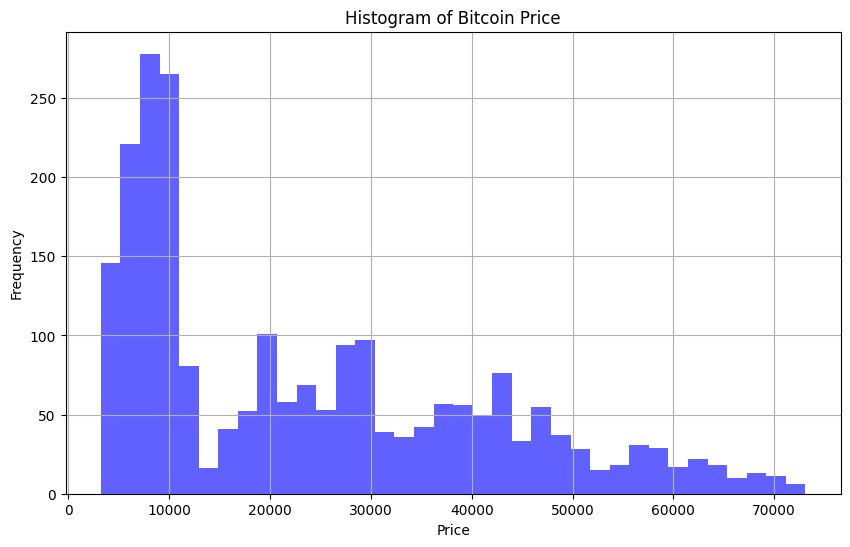

In [184]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with Bitcoin price data

# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram for Bitcoin price
plt.hist(merged_df['price'], bins=36, color='blue', alpha=0.62)

# Customize the plot
plt.title('Histogram of Bitcoin Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)

# Show plot
plt.show()


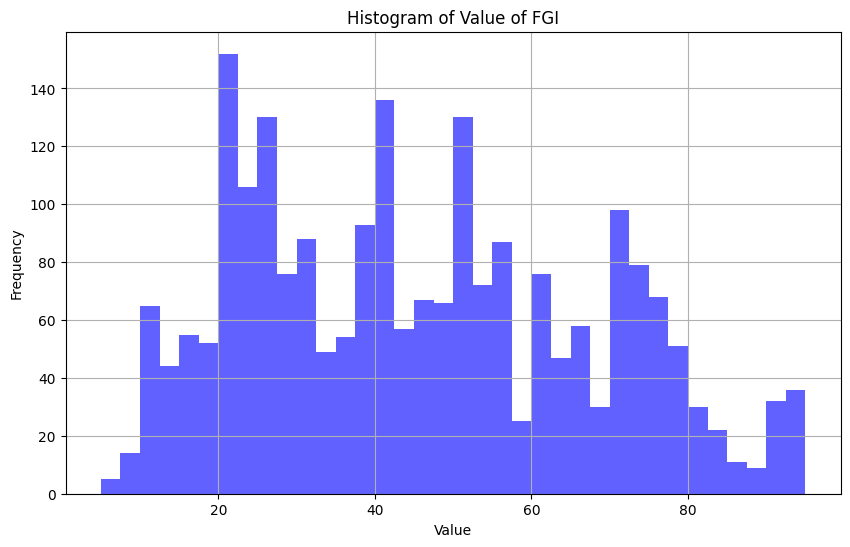

In [185]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with Bitcoin price data

# Set figure size
plt.figure(figsize=(10, 6))

# Plot histogram for Bitcoin price
plt.hist(merged_df['value'], bins=36, color='blue', alpha=0.62)

# Customize the plot
plt.title('Histogram of Value of FGI')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)

# Show plot
plt.show()


<Axes: xlabel='Date'>

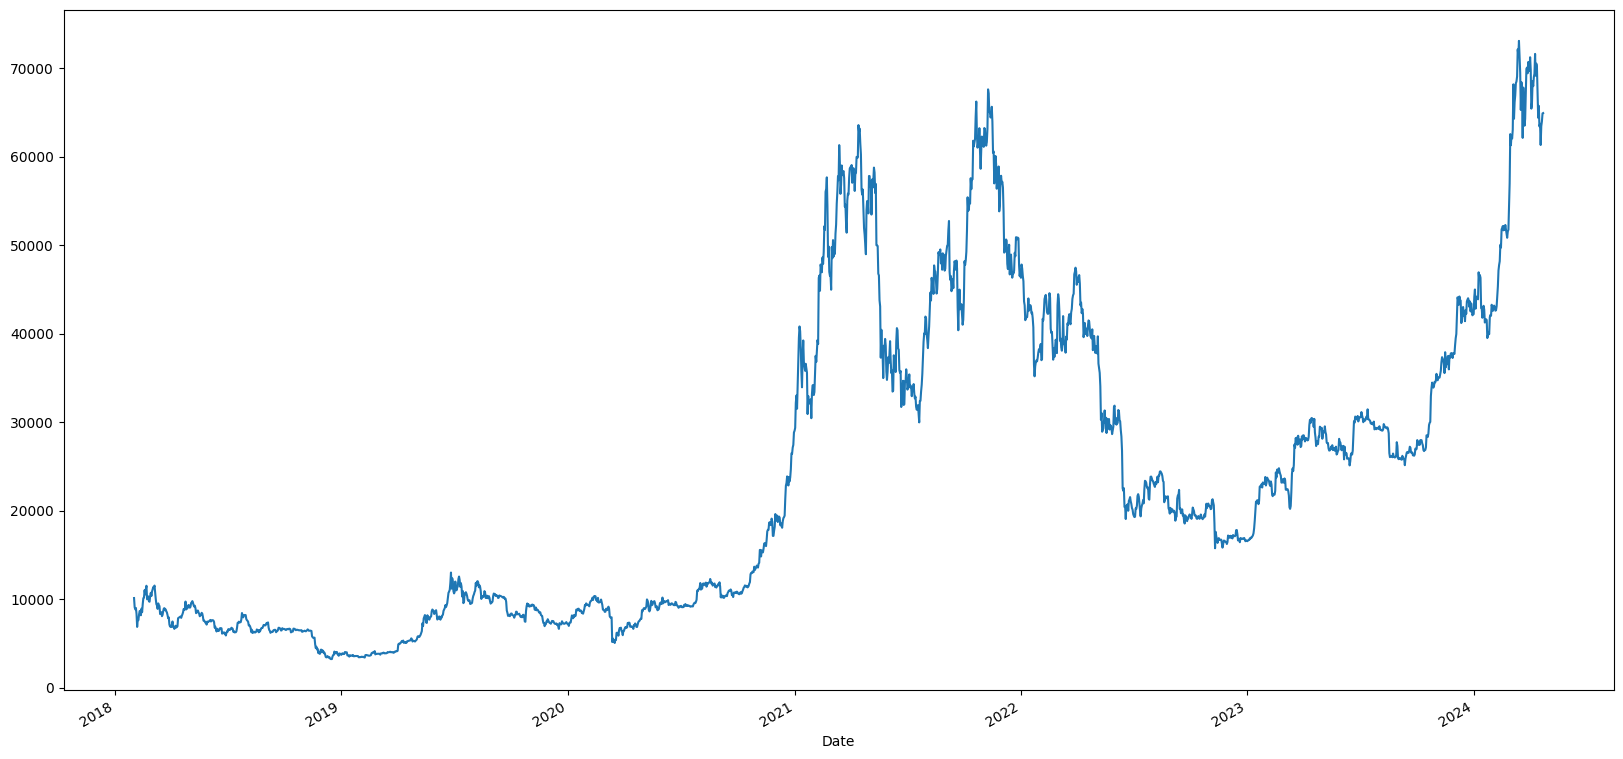

In [186]:
# Plotting 'Bitcoin_Price' column
merged_df['price'].plot(figsize=(20, 10))

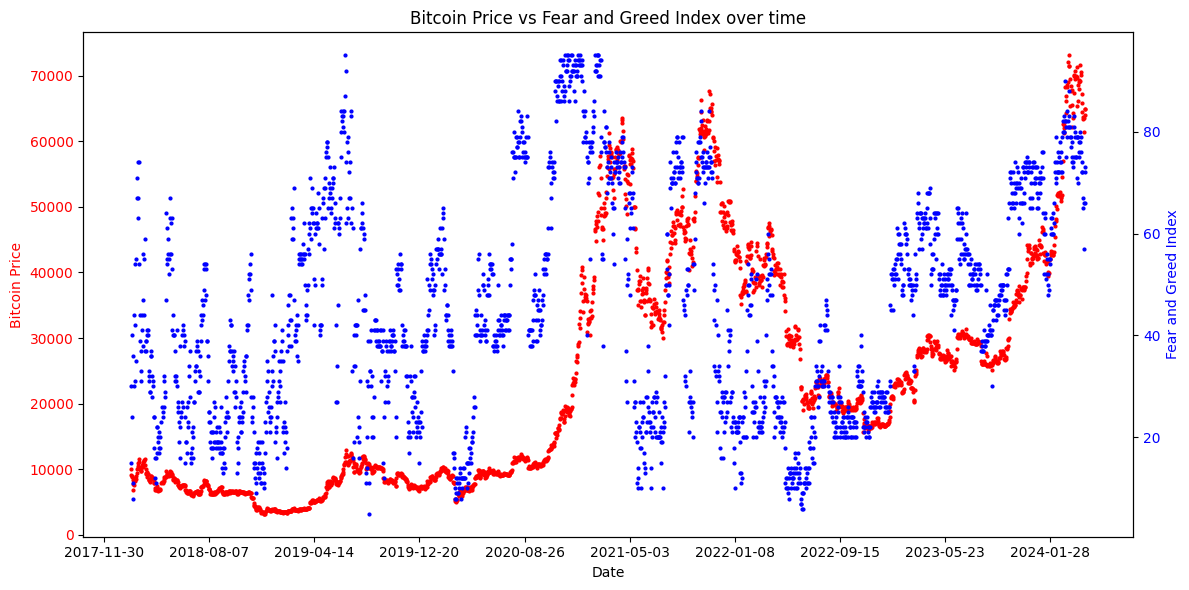

In [187]:
## Scatter plot of Fear and Greed Index and BTC price over time
from matplotlib.dates import DateFormatter

# Assuming Stock and Fear are DataFrames and are already defined

# Plot the scatterplot
fig, ax1 = plt.subplots(figsize=(12, 6))  # Increase figure size

# Scatter plot for Bitcoin Price
ax1.scatter(merged_df.index, merged_df['price'], color='red', label='Bitcoin Price', s=4)  # Increase marker size
ax1.set_xlabel('Date')
ax1.set_ylabel('Bitcoin Price', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a secondary y-axis for Fear and Greed Index
ax2 = ax1.twinx()
ax2.scatter(merged_df.index, merged_df['value'], color='blue', label='Fear and Greed Index', s=4)  # Increase marker size
ax2.set_ylabel('Fear and Greed Index', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('Bitcoin Price vs Fear and Greed Index over time')

# Set date format for x-axis ticks
date_format = DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(date_format)

# Set tick locations to display every month
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

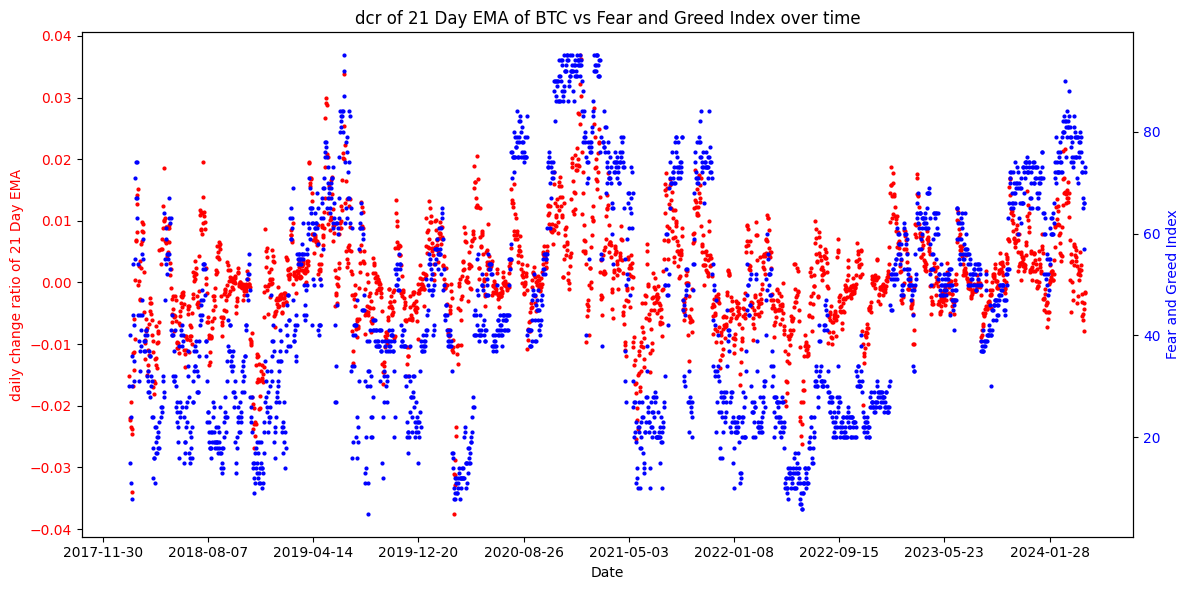

In [188]:
## Scatter plot of Fear and Greed Index and BTC price over time
from matplotlib.dates import DateFormatter

# Assuming Stock and Fear are DataFrames and are already defined

# Plot the scatterplot
fig, ax1 = plt.subplots(figsize=(12, 6))  # Increase figure size

# Scatter plot for Bitcoin Price
ax1.scatter(merged_df.index, merged_df['e_dcr21'], color='red', label='Bitcoin Price', s=4)  # Increase marker size
ax1.set_xlabel('Date')
ax1.set_ylabel('daily change ratio of 21 Day EMA', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Create a secondary y-axis for Fear and Greed Index
ax2 = ax1.twinx()
ax2.scatter(merged_df.index, merged_df['value'], color='blue', label='Fear and Greed Index', s=4)  # Increase marker size
ax2.set_ylabel('Fear and Greed Index', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('dcr of 21 Day EMA of BTC vs Fear and Greed Index over time')

# Set date format for x-axis ticks
date_format = DateFormatter("%Y-%m-%d")
ax1.xaxis.set_major_formatter(date_format)

# Set tick locations to display every month
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

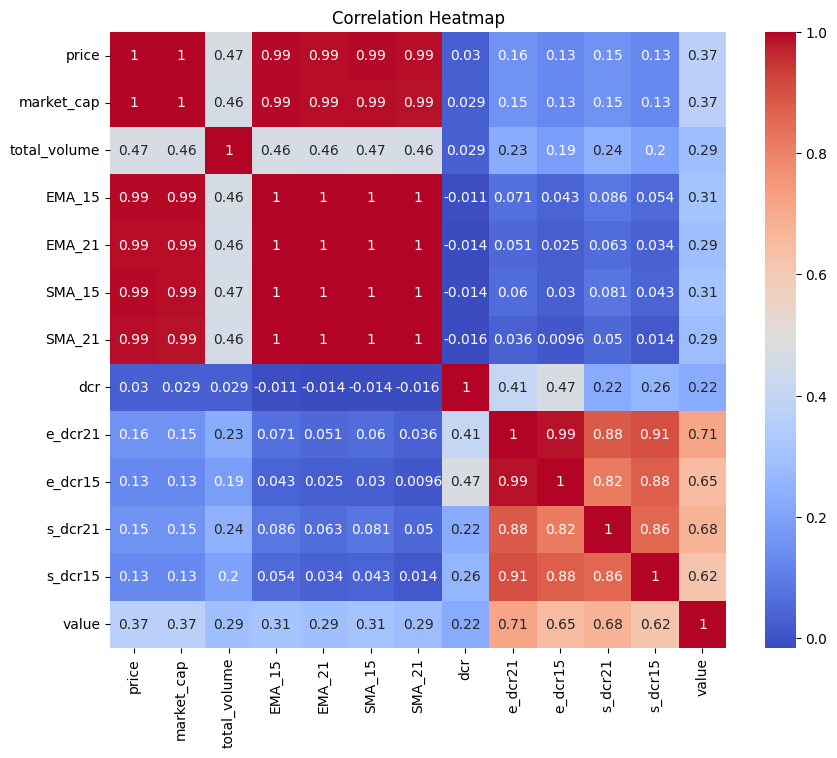

In [189]:
 # Calculate correlation matrix
import seaborn as sns
corr_matrix = numeric_df.corr()

    # Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

We merged and looked correlation map of merged dataframe of fgi and btc. It is not important correlation of between EMA, SMA and BTC price since all calculated based on BTC price. Also we see total_volume does not have a high correlation with other variables also it is hard to predict. We can also ignore daily change ratios of EMA, SMA, BTC price correlation because of the same reason  we did directly with their values. I want to express the relations of variables with the value of FGI which can be taken from CNN Fear and Greed Index. It has high correlation with long term,21 days, Exponential Moving Average. We can look at their relation and relations of daily change ratios.

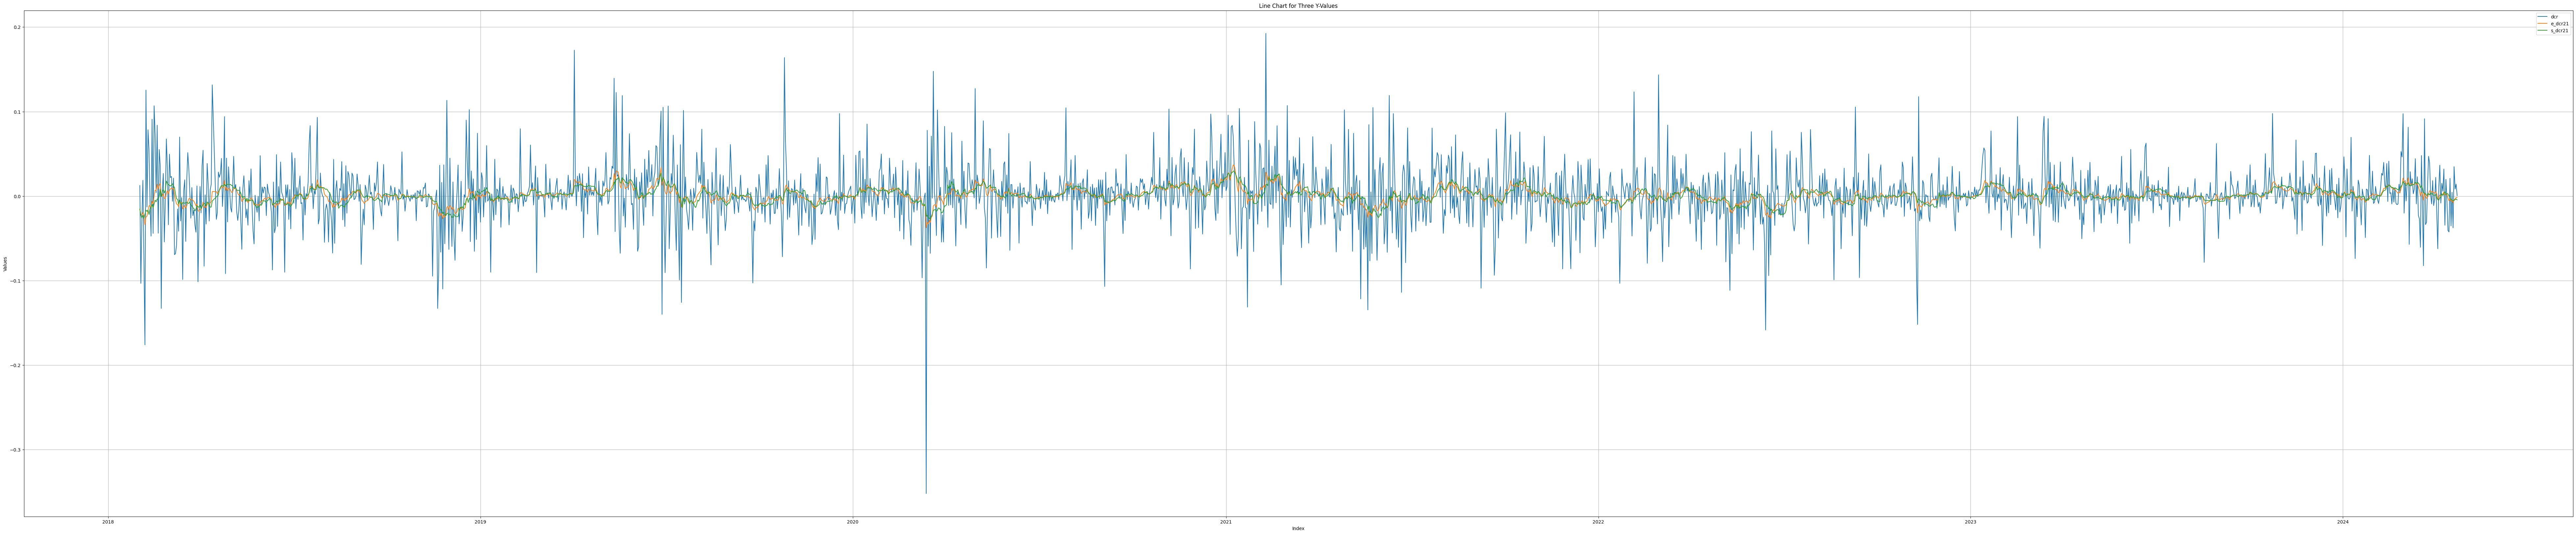

In [190]:
## Express the relation between indicators and price's daily change ratio visually.

plt.figure(figsize=(100, 20))
plt.plot(merged_df.index, merged_df['dcr'], label='dcr')
plt.plot(merged_df.index, merged_df['e_dcr21'], label='e_dcr21')
plt.plot(merged_df.index, merged_df['s_dcr21'], label='s_dcr21')

# Add labels, title, legend, and grid
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Chart for Three Y-Values')
plt.legend()
plt.grid(True)
plt.show()

Lets merge and look at the relation between e_dcr21 and value of FGI during the date.

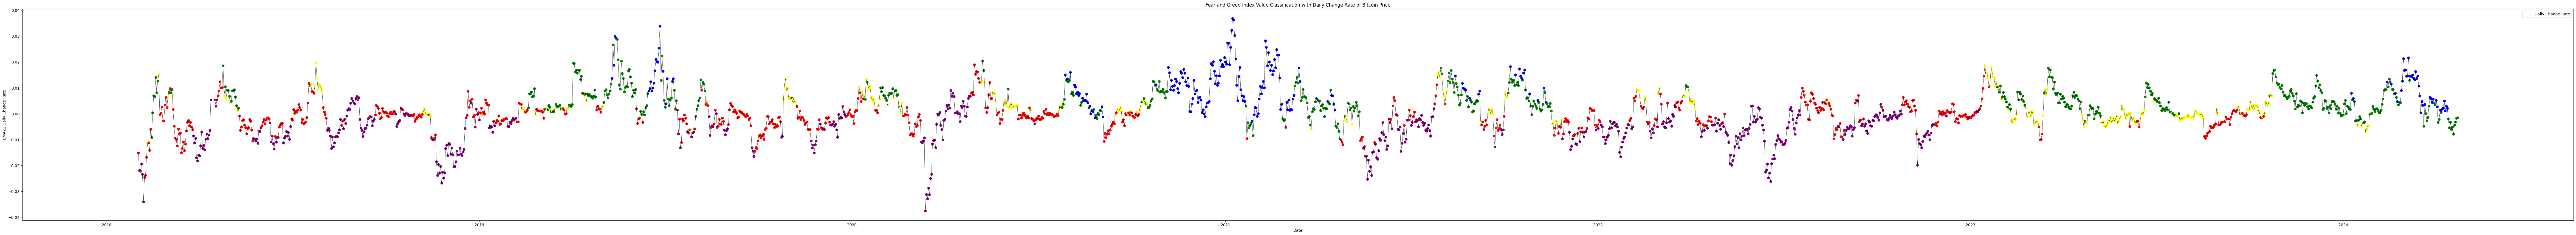

In [191]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns: 'Fear_and_Greed_Index', 'Bitcoin_Price', and 'Daily_Change_Rate'

def plot_fgi_and_daily_change(df):
    """
    Plot Fear and Greed index value classification along with daily change rate of Bitcoin price.


        df (pandas.DataFrame): DataFrame with columns: 'Fear_and_Greed_Index', 'Bitcoin_Price', and 'Daily_Change_Rate'.

    Returns:
        None
    """
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(120, 10))

    # Plot daily change rate of Bitcoin price
    ax.plot(df.index, df['e_dcr21'], color='black', label='Daily Change Rate', linewidth=0.5)

    # Define color mapping for FGI value classification
    colors = {'Extreme Fear': 'purple', 'Fear': 'red', 'Neutral': 'yellow', 'Greed': 'green', 'Extreme Greed': 'blue'}

    # Iterate through FGI values and plot them with corresponding colors
    for date, fgi_value, classification in zip(df.index, df['value'], df['value_classification']):
        ax.scatter(date, df.loc[date, 'e_dcr21'], color=colors[classification])

    ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
    # Add legend and labels
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('EMA21 Daily Change Rate')
    ax.set_title('Fear and Greed Index Value Classification with Daily Change Rate of Bitcoin Price')

    plt.show()

# Example usage:
# Plot Fear and Greed index value classification with daily change rate of EMA21 price
plot_fgi_and_daily_change(merged_df)


From the graph we can say that value classification Extreme Greed almost always means high dcr on price, Greed usually means increase on price or too small decreases, Neutral means almost zero change, however increase of, from red to green, value might mean  slight increase while negative slope means slight decrease. In Extreme Fear value we can observe strong negative slope on price while Fear usually shows itself with slight decrease in price. We can openly claim that there is a correlation between e_dcr21 and value.

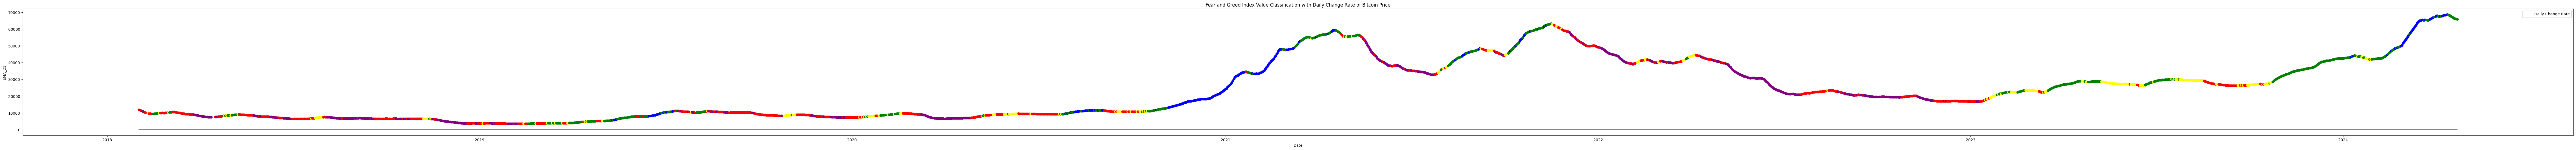

In [192]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns: 'Fear_and_Greed_Index', 'Bitcoin_Price', and 'Daily_Change_Rate'

def plot_fgi_and_daily_change(df):
    """
    Plot Fear and Greed index value classification along with daily change rate of Bitcoin price.

    Parameters:
        df (pandas.DataFrame): DataFrame with columns: 'Fear_and_Greed_Index', 'Bitcoin_Price', and 'Daily_Change_Rate'.

    Returns:
        None
    """
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(120, 6))

    # Plot daily change rate of Bitcoin price
    ax.plot(df.index, df['dcr'], color='black', label='Daily Change Rate', linewidth=0.5)

    # Define color mapping for FGI value classification
    colors = {'Extreme Fear': 'purple', 'Fear': 'red', 'Neutral': 'yellow', 'Greed': 'green', 'Extreme Greed': 'blue'}

    # Iterate through FGI values and plot them with corresponding colors
    for date, fgi_value, classification in zip(df.index, df['value'], df['value_classification']):
        ax.scatter(date, df.loc[date, 'EMA_21'], color=colors[classification])

    ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
    # Add legend and labels
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('EMA_21')
    ax.set_title('Fear and Greed Index Value Classification with Daily Change Rate of Bitcoin Price')

    plt.show()

# Example usage:
# Plot Fear and Greed index value classification with daily change rate of Bitcoin price
plot_fgi_and_daily_change(merged_df)


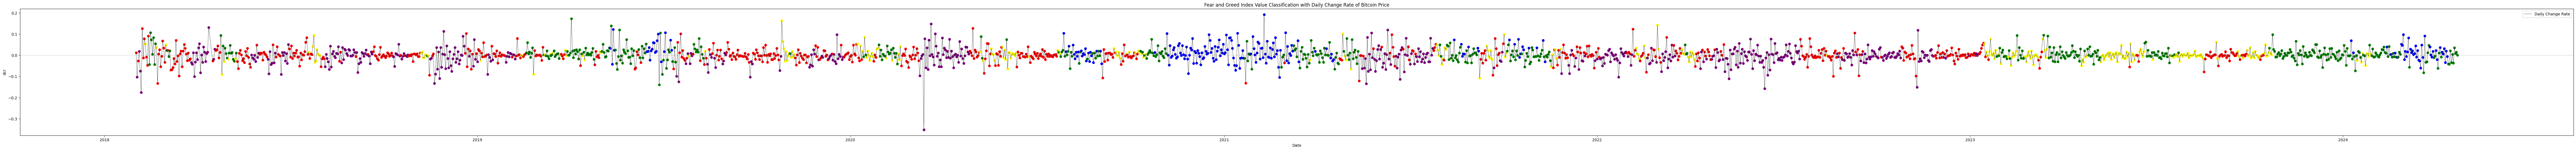

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns: 'Fear_and_Greed_Index', 'Bitcoin_Price', and 'Daily_Change_Rate'

def plot_fgi_and_daily_change(df):
    """
    Plot Fear and Greed index value classification along with daily change rate of Bitcoin price.

    Parameters:
        df (pandas.DataFrame): DataFrame with columns: 'Fear_and_Greed_Index', 'Bitcoin_Price', and 'Daily_Change_Rate'.

    Returns:
        None
    """
    # Create a figure and axis object
    fig, ax = plt.subplots(figsize=(120, 6))

    # Plot daily change rate of Bitcoin price
    ax.plot(df.index, df['dcr'], color='black', label='Daily Change Rate', linewidth=0.5)

    # Define color mapping for FGI value classification
    colors = {'Extreme Fear': 'purple', 'Fear': 'red', 'Neutral': 'yellow', 'Greed': 'green', 'Extreme Greed': 'blue'}

    # Iterate through FGI values and plot them with corresponding colors
    for date, fgi_value, classification in zip(df.index, df['value'], df['value_classification']):
        ax.scatter(date, df.loc[date, 'dcr'], color=colors[classification])

    ax.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
    # Add legend and labels
    ax.legend()
    ax.set_xlabel('Date')
    ax.set_ylabel('dcr')
    ax.set_title('Fear and Greed Index Value Classification with Daily Change Rate of Bitcoin Price')

    plt.show()

# Example usage:
# Plot Fear and Greed index value classification with daily change rate of Bitcoin price
plot_fgi_and_daily_change(merged_df)


It seems we do not observe the correlation between e_dcr21 and value with dcr of BTC.


# Hypothesis Testing

As a result of analysing data andrelations between variables we can conclude our Hypothesis and test it.

Null Hypothesis(H0):  There is a statistically significant linear relationship between daily change ratio of BTC's 21 day Exponential Moving Average and CNN BTC Fear&Greed Index.

Alternative Hypothesis (H1): There is a statistically significant linear relationship between the daily change ratio of BTC's 21-day Exponential Moving Average and the CNN BTC Fear & Greed Index.


In [194]:
def standardize(data):
    # Calculate the mean and standard deviation of the data
    mean = data.mean()
    std = data.std()

    # Standardize the data
    standardized_data = (data - mean) / std

    return standardized_data

In [195]:
import statsmodels.api as sm
from scipy import stats


correlation, p_value = stats.pearsonr(standardize(merged_df['e_dcr21']), standardize(merged_df['value']))

# Set significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis (H0): There is a statistically significant linear relationship between daily change ratio of BTC's 21 day Exponential Moving Average and CNN BTC Fear&Greed Index.")
else:
    print("Fail to reject null hypothesis (H0): Insufficient evidence for a statistically significant linear relationship.")

Reject null hypothesis (H0): There is a statistically significant linear relationship between daily change ratio of BTC's 21 day Exponential Moving Average and CNN BTC Fear&Greed Index.


We rehected null hypothesis and showed the significant relation between two variables. Now, we can build a linear regression model to predict e_dcr21 (dcr of 21 days EMA) based on value(FGI).

To test this hypothesis, I standardized them and performed a correlation analysis between daily change ratio of 21 days Exponential Moving Average of Bitcoin price and Fear and Greed Index by using Pearson's correlation coefficient. I computed the correlation coefficient between these two variables. I set a significance level (alpha), typically 0.05. The hypothesis test supported the alternative hypothesis, so we can proceed with building a regression model to further analyze and predict the relationship between them.

# Linear Regression

Feature Selection: The Fear and Greed Index will likely be my independent variable, and dcr of EMA21 will be my dependent variable.

Splitting the Data: In regression model divided the dataset into training and testing sets to evaluate the performance of the regression model. A common split is 80% for training and 20% for testing.

Model Training: I fit a linear regression model to the data which I split %80 for training. I used directly python library.


In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



"""
Build a linear regression model for predicting e_dcr based on value.

Parameters:
    df (pandas.DataFrame): DataFrame with columns: 'e_dcr' and 'value'.

Returns:
    None
"""
# Split the data into features (X) and target variable (y)
X = standardize(merged_df[['value']] ) # Features
y =standardize( merged_df[['e_dcr21']])  # Dependent variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
r2_score = model.score(X, y)
print(f"R-squared value: {r2_score}")
# Print model coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)






Mean Squared Error: 0.49765492141628215
R-squared value: 0.5108934976663186
Intercept: [0.0053768]
Coefficients: [[0.71464111]]


R-squared value (R^2): The R^2 value of 0.511 suggests that approximately 51.1% of the variability in e_dcr21 can be explained by the variability in the value variable. While above 0.5, indicating some explanatory power, it might be desirable to achieve a higher R^2 value for a more robust model but also since Bitcoin price fluctuates a lot even in short terms it is acceptable for linear regression models. I predict It will have higher values on random forest model.

Mean Squared Error (MSE): The MSE of 0.498 indicates that, on average, the squared difference between the predicted and actual e_dcr21 values is approximately 0.498. Lower values would be better, but has the same problem with R^2 value.

Intercept and Coefficients: The intercept of approximately 0.0054 and coefficient of approximately 0.7146 indicate that, for every unit increase in the value variable, the predicted e_dcr21 increases by about 0.7146 units. The intercept represents the expected e_dcr21 value when the value variable is zero. It gives us the regression line of model.


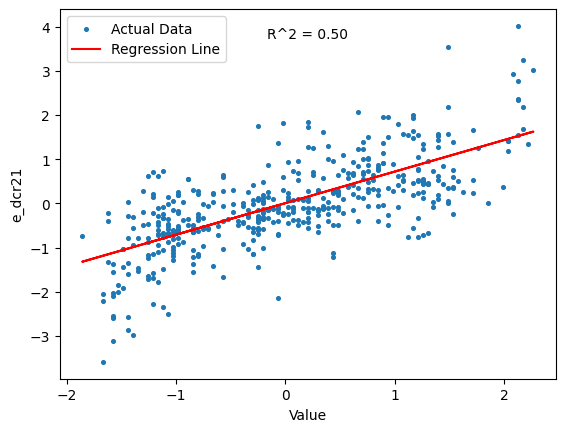

In [197]:
# Assuming X and y are pandas DataFrame objects
X_values = X_test.squeeze()  # Convert DataFrame to 1D array
y_values = y_test.squeeze()  # Convert DataFrame to 1D array

plt.scatter(X_values, y_values, s=7, label='Actual Data')
plt.plot(X_values, y_pred, color='red', label='Regression Line')
plt.xlabel('Value')  # Add x-axis label
plt.ylabel('e_dcr21')  # Add y-axis label

# Calculate R^2 value
r_squared = model.score(X_test, y_test)

# Add R^2 value to the plot
plt.text(0.5, 0.95, f'R^2 = {r_squared:.2f}', ha='center', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.legend()
plt.show()


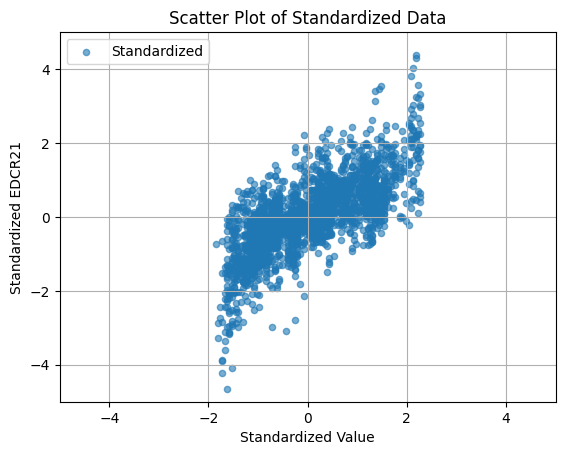

In [198]:
import matplotlib.pyplot as plt

def scatter(x, y, label, xlim=(-5, 5), ylim=(-5, 5), alpha=0.6, s=20, xlabel=None, ylabel=None, title=None):

    ax = plt.gca()
    ax.scatter(x, y, alpha=alpha, s=s, label=label)
    ax.set_xbound(*xlim)
    ax.set_ybound(*ylim)
    ax.grid()
    ax.legend()

    # Add axis labels and title
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)

# Example usage:
scatter(standardize(merged_df["value"]), standardize(merged_df["e_dcr21"]), "Standardized",
        xlabel="Standardized Value", ylabel="Standardized EDCR21", title="Scatter Plot of Standardized Data")


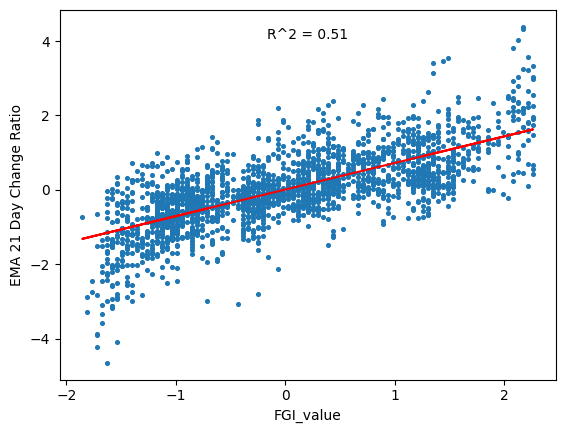

In [199]:
# Assuming X and y are pandas DataFrame objects
X_values = X.squeeze()  # Convert DataFrame to 1D array
y_values = y.squeeze()  # Convert DataFrame to 1D array

# Make predictions
Y_pred = model.predict(X)

# Plot the data points and regression line
plt.scatter(X_values, y_values, s=7)
plt.plot(X_values, Y_pred, color='red')

# Calculate R^2 value
r_squared = model.score(X, y)

# Add R^2 value to the plot
plt.text(0.5, 0.95, f'R^2 = {r_squared:.2f}', ha='center', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')

plt.xlabel('FGI_value')  # Add x-axis label
plt.ylabel('EMA 21 Day Change Ratio')  # Add y-axis label
plt.show()


# Machine Learning Algorithms



## kNN Model

We can build our first ML model kNN. First, we will standardize data and split it into %70 training, %15 validation, %15 test data.

In [200]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Split the data into features (X) and target variable (y)

X = standardize(merged_df[['value']] )  # Features
y = standardize( merged_df[['e_dcr21']])   # Dependent variable

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [202]:
# 80% for training and 20% for testing-validation
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.30, random_state=42)
# 10% validation, 10% test
X_test, X_val, y_test, y_val = train_test_split(X_remaining, y_remaining, test_size=0.50, random_state=42)

Lets find the best kNN value in terms of the lowest RMSE between (1,25).

In [203]:
k_values = np.arange(1, 25, 1)

# Dictionary to store errors for each k
errors = {}

# Train and evaluate the k-NN model for each k
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error = mean_squared_error(y_test, y_pred)
    errors[k] = error

# Find the k value with the minimum error
optimal_k = min(errors, key=errors.get)
min_error = errors[optimal_k]

# Train the model with the optimal k value
knn_optimal = KNeighborsRegressor(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
y_pred_optimal = knn_optimal.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_optimal))

print(f"The optimal k value is: {optimal_k}")
print(f"The RMSE is: {rmse:.5f}")

The optimal k value is: 23
The RMSE is: 0.73017


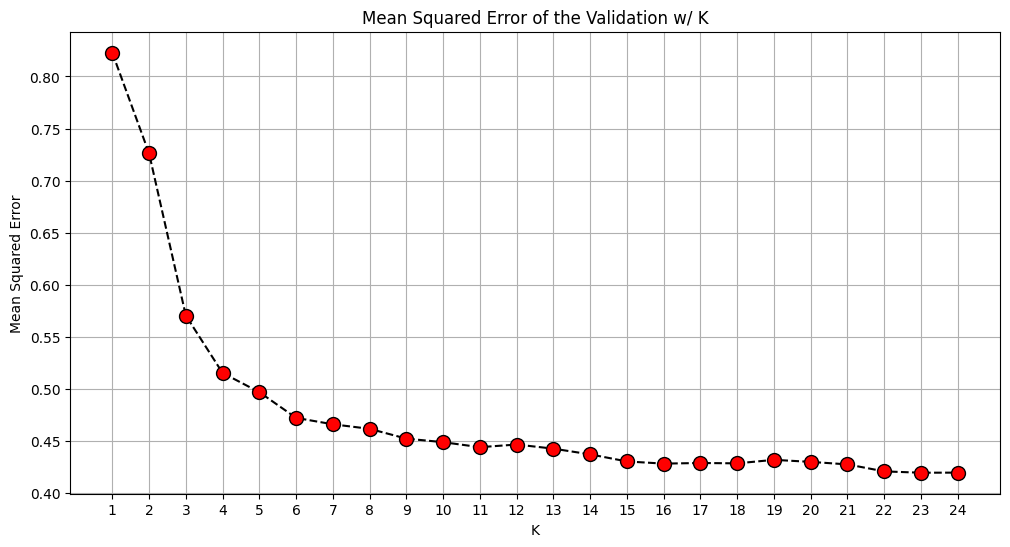

In [204]:
K_range = np.arange(1, 25, 1)
mse_list = []

for k in K_range:
    # create a new model with current K
    knn = KNeighborsRegressor(n_neighbors=k)
    # fit training data
    knn.fit(X_train, y_train)
    # predict the validation data
    y_pred = knn.predict(X_val)
    # obtain the MSE value
    mse = mean_squared_error(y_val, y_pred)
    mse_list.append(mse)

plt.figure(figsize=(12, 6))
plt.plot(K_range, mse_list, color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Mean Squared Error of the Validation w/ K')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.xticks(K_range)
plt.grid()
plt.show()

Now we can train it by optimal k which is 23.

In [205]:
# Initialize and train the kNN model
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Predict on the test set
knn_predictions = knn.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)

print(f'kNN Mean Squared Error: {knn_mse}')
print(f'kNN Regressor RMSE: {knn_rmse}')
print(f"kNN Regressor R²: {knn_r2}")

kNN Mean Squared Error: 0.5331526666929136
kNN Regressor RMSE: 0.7301730388701801
kNN Regressor R²: 0.5418591407021602


## Decision Tree Model

In [206]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

scaler = StandardScaler()
# Split the data into features (X) and target variable (y)

X = standardize(merged_df[['value']] )  # Features
y = standardize( merged_df[['e_dcr21']])   # Dependent variable

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

In [207]:
# This will create train and test datasets from the original dataset that we have where
# 80% of original dataframe will be train set and 20% of it will be test set to evaluate the Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [208]:
print(X_train.shape, X_test.shape)

(1816, 1) (454, 1)


In [209]:
# Define the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameters grid for Grid Search
param_grid = {
    'max_depth': [None, 3, 6, 9],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4]
}

# Perform Grid Search to find the best hyperparameters
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

print("Best Hyperparameters:")
print(best_params)

# Build the Decision Tree model with the best hyperparameters
best_dt_model = DecisionTreeRegressor(**best_params)
best_dt_model.fit(X_train, y_train)

# Predictions
dt_predictions = best_dt_model.predict(X_test)

# Evaluation
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
print(f"\nDecision Tree Regressor MSE: {dt_mse}")
print(f'Decision Tree Regressor RMSE: {dt_rmse}')
print(f"Decision Tree Regressor R²: {dt_r2}")

Best Hyperparameters:
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2}

Decision Tree Regressor MSE: 0.47976161994465455
Decision Tree Regressor RMSE: 0.6926482656764936
Decision Tree Regressor R²: 0.5213749190674253


## Random Forest Regression Model

Now we can built random forest regression model. Firstly, we need to decide which feature is the most important to decide.

In [210]:
numeric_df = merged_df.select_dtypes(include=['float64', 'int64'])

Feature Importances:
         Feature  Importance
8        e_dcr21    0.523313
1     market_cap    0.090605
10       s_dcr21    0.066332
0          price    0.061212
5         SMA_15    0.055219
2   total_volume    0.046765
6         SMA_21    0.037679
4         EMA_21    0.036732
9        e_dcr15    0.023793
3         EMA_15    0.023078
11       s_dcr15    0.020647
7            dcr    0.014624


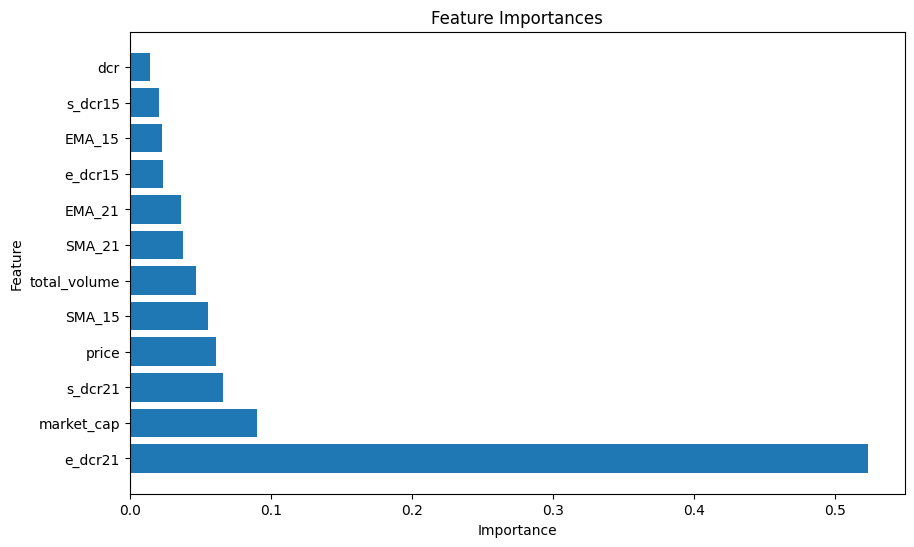

In [211]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load your dataset (merged_df)
# Assuming merged_df contains features (price, market_cap, total_volume, EMA_15, EMA_21, SMA_15, SMA_21, dcr, e_dcr21, e_dcr15, s_dcr21, s_dcr15) and target variable (value)

# Separate features and target variable
X = numeric_df.drop(columns=['value'])  # Features
y = numeric_df['value']  # Target variable

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_regressor.fit(X, y)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


It seems e_dcr21 is most important feature with 0.52 importance level. Now we can create our model based on it by seperating %80 training and %20 test data.

In [212]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming merged_df is your DataFrame

# Standardize the features and target
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(merged_df[['value']])
y = scaler_y.fit_transform(merged_df[['e_dcr21']])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train.ravel())  # Flatten y_train to make it a 1D array

# Make predictions
y_pred = rf.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1))

# Calculate performance metrics
rf_mse = mean_squared_error(y_test_inv, y_pred_inv)
rf_r2 = r2_score(y_test_inv, y_pred_inv)
rf_rmse = mean_squared_error(y_test_inv, y_pred_inv, squared=False)
print(f'Random Forest Regressor MSE: {rf_mse}')
print(f'Random Forest Regressor RMSE: {rf_rmse}')
print(f'Random Forest Regressor R²: {rf_r2}')


Random Forest Regressor MSE: 3.252457726802272e-05
Random Forest Regressor RMSE: 0.00570303228712785
Random Forest Regressor R²: 0.5210455011073718


# Evaluation

In [213]:
# Comparison
if knn_mse < rf_mse:
    print("kNN Model performs better comparing to mean square error.")
elif rf_mse < knn_mse:
    print("Random Forest Regression Model performs better comparing to mean square error.")
else:
    print("Both models perform similarly.")

if knn_r2 < rf_r2:
    print("Random Forest Regression Model performs better comparing to R square value.")
else:
    print("kNN Model performs better comparing to R square value.")

Random Forest Regression Model performs better comparing to mean square error.
kNN Model performs better comparing to R square value.


The Random Forest model achieved the lowest error metrics (MSE and RMSE), indicating its superior performance in making precise predictions. Despite having similar R² scores across the models, the Random Forest's minimal prediction error highlights its robustness in capturing the nuances of the dataset.